In [1]:
# pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# importa dataframe
df = pd.read_csv("employee.csv") # --> trocar para nome a caminho do seu dataframe

In [3]:
# conta valores nulos em cada coluna
# se houver, sera necessario tratar
for column in df.columns:
    print(column, df[column].isnull().sum())

Age 0
Attrition 0
BusinessTravel 0
DailyRate 0
Department 0
DistanceFromHome 0
Education 0
EducationField 0
EmployeeCount 0
EmployeeNumber 0
EnvironmentSatisfaction 0
Gender 0
HourlyRate 0
JobInvolvement 0
JobLevel 0
JobRole 0
JobSatisfaction 0
MaritalStatus 0
MonthlyIncome 0
MonthlyRate 0
NumCompaniesWorked 0
Over18 0
OverTime 0
PercentSalaryHike 0
PerformanceRating 0
RelationshipSatisfaction 0
StandardHours 0
StockOptionLevel 0
TotalWorkingYears 0
TrainingTimesLastYear 0
WorkLifeBalance 0
YearsAtCompany 0
YearsInCurrentRole 0
YearsSinceLastPromotion 0
YearsWithCurrManager 0


In [4]:
# conta valores unicos
# colunas valores unicos serao dropadas na celula abaixo
for column in df.columns:
    print(column, df[column].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [5]:
# dropa colunas com valores unicos
# colunas com somente um unico valor para todas as linhas nao sao necessarias
df = df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis = 1)
df.shape

(1470, 31)

In [6]:
# verifica tipos das variaveis
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [7]:
# encoding de variaveis categoricas
for column in df.columns:
    if df[column].dtypes == "object":
        df[column] = df[column].astype("category")

In [8]:
# verifica tipo das variaveis apos o encoding
df.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

In [9]:
# verifica pressupostos para o teste de correlacao de pearson:
# 1/3. dados seguem distribuicao normal --> ja furou aqui
# 2/3. ausencia de outliers
# 3/3. homocedasticidade dos residuos

for column in df.columns:
    if df[column].dtype == "int64":
        shapiro_pvalue = stats.shapiro(df[column]).pvalue
        print(f"Column: {column:<30} p-value: {shapiro_pvalue:.5f}")

Column: Age                            p-value: 0.00000
Column: DailyRate                      p-value: 0.00000
Column: DistanceFromHome               p-value: 0.00000
Column: Education                      p-value: 0.00000
Column: EnvironmentSatisfaction        p-value: 0.00000
Column: HourlyRate                     p-value: 0.00000
Column: JobInvolvement                 p-value: 0.00000
Column: JobLevel                       p-value: 0.00000
Column: JobSatisfaction                p-value: 0.00000
Column: MonthlyIncome                  p-value: 0.00000
Column: MonthlyRate                    p-value: 0.00000
Column: NumCompaniesWorked             p-value: 0.00000
Column: PercentSalaryHike              p-value: 0.00000
Column: PerformanceRating              p-value: 0.00000
Column: RelationshipSatisfaction       p-value: 0.00000
Column: StockOptionLevel               p-value: 0.00000
Column: TotalWorkingYears              p-value: 0.00000
Column: TrainingTimesLastYear          p-value: 

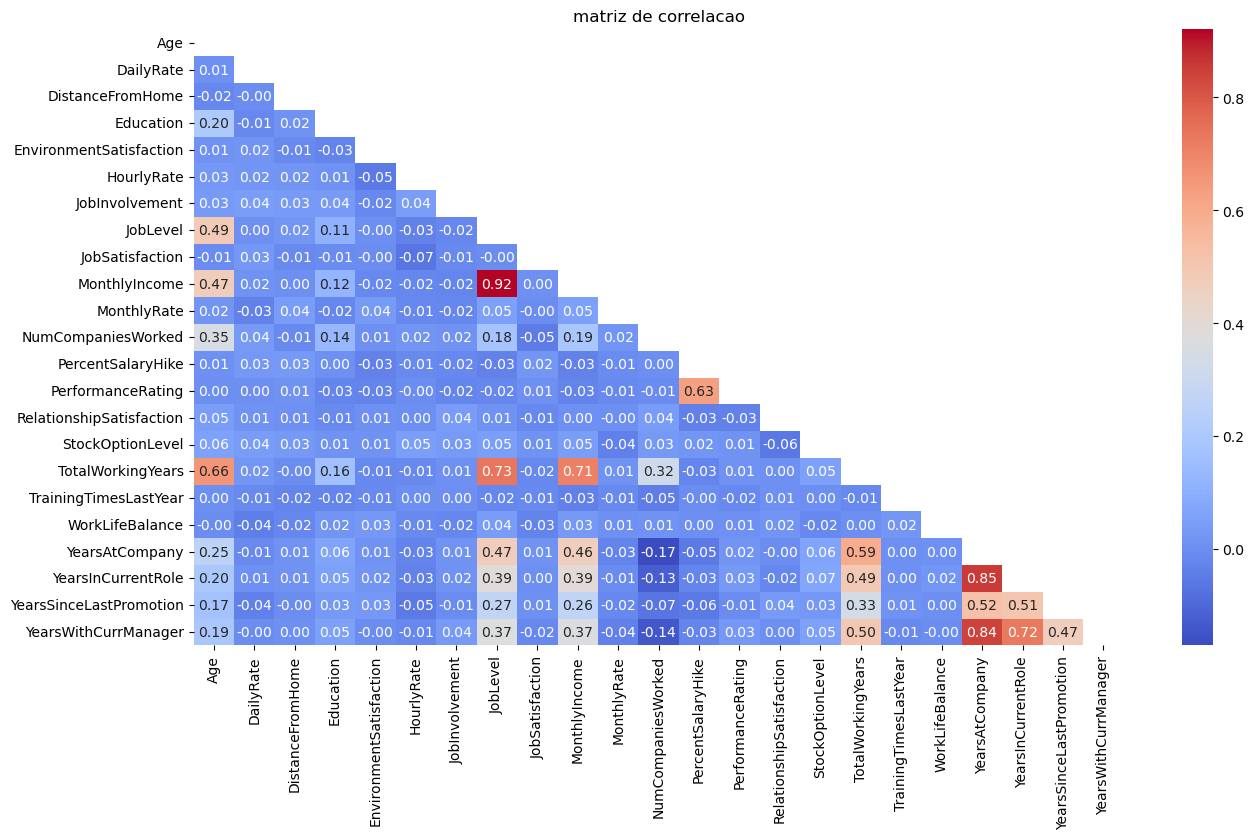

In [10]:
# como o primeiro pressuposto para o uso do teste de correlacao de person nao foi atendido,
# temos duas opcoes: spearman e kendall
# spearman --> teste nao parametrico (seguiremos com esse)
# kendall --> tbm nao parametrico. mais usado quando o n e pequeno ou quando ha muitos empates. Tbm tende a dar um resultado mais conservador do que o spearman

# plot heatmap
corr_matrix = df.corr(method = "spearman", numeric_only = True)
upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", mask = upper_tri, fmt = ".2f")
plt.title('matriz de correlacao')
plt.show()

In [11]:
# cria funcao para deletar variaveis com correlacao forte
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [12]:
# usa a funcao criada acima para selecionar as variaveis com correlacao forte: |corr| > 0.5
del_col = correlation(df.select_dtypes(include = 'int64'), 0.50)

In [13]:
# deleta variaveis com correlacao forte
df = df.drop(del_col, axis = 1)
df.shape

(1470, 23)

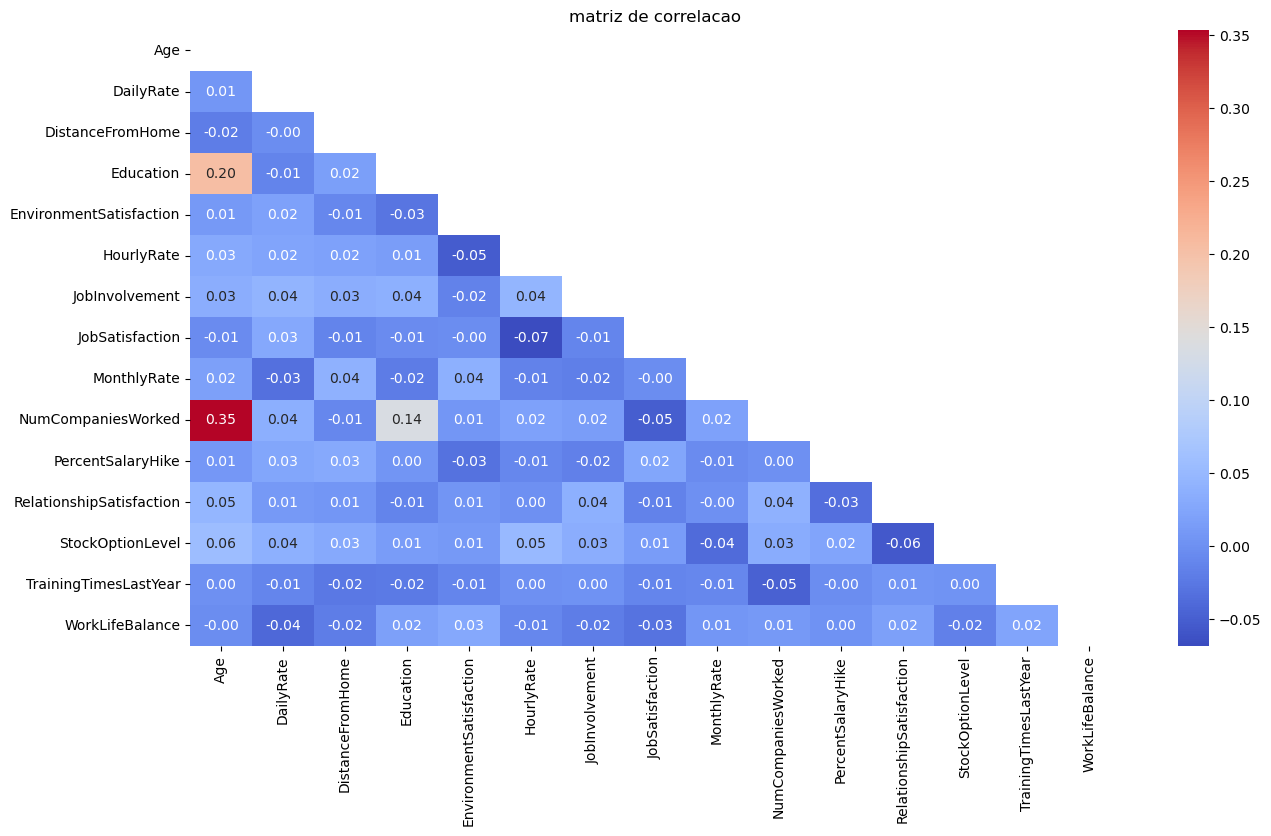

In [14]:
# plota novo heatmap com df reduzido
corr_matrix = df.corr(method = "spearman", numeric_only = True)
upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", mask = upper_tri, fmt = ".2f")
plt.title('matriz de correlacao')
plt.show()